# Time Series Forecasting - Graded assessment (40 Marks)

### DATA_SET:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from datetime import datetime,timedelta
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

A time series dataset depicting the total number of female births recording in California, USA during the year of 1959.
This dataset has only the date ("dd/mm/yyyy" format), and the number of births. There are 365 records in total.

* date ==			date field	
* births == 	    total number of female births recording in California (numeric)

#### Kindly change the below cells from markdown to code and execute it 

import pandas as pd

import csv

with open("daily-total-female-births-CA","r")as file:

    reader=csv.reader(file)
df=pd.read_csv("daily-total-female-births-CA.csv")

df.head()

#### 1.	Data preparation (5 marks)


a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables? (1 MARK)

b. convert the data into time series (2 MARK)


c. Check for defects in the data such as missing values, null, etc. (1 MARK)

d. Visualize the time series using relevant plots. (1 MARK)


In [2]:
df=pd.read_csv('data_set.csv')
df.head()

,date,births
0,01-01-1959,35
1,02-01-1959,32
2,03-01-1959,30
3,04-01-1959,31
4,05-01-1959,44


In [3]:
df.tail()

,date,births
360,27-12-1959,37
361,28-12-1959,52
362,29-12-1959,48
363,30-12-1959,55
364,31-12-1959,50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [5]:
#from pandas.tseries.offsets import Bday
date =pd.date_range(start='01/01/1959',end='31/12/1959',freq='D')
date

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [6]:
df['TimeStamp']=pd.to_datetime(date,format='%d-%m-%y')
df=df.set_index('TimeStamp')
df=df.drop('date',axis=1)
df

,births
TimeStamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [7]:
df.isnull().sum()

births    0
dtype: int64

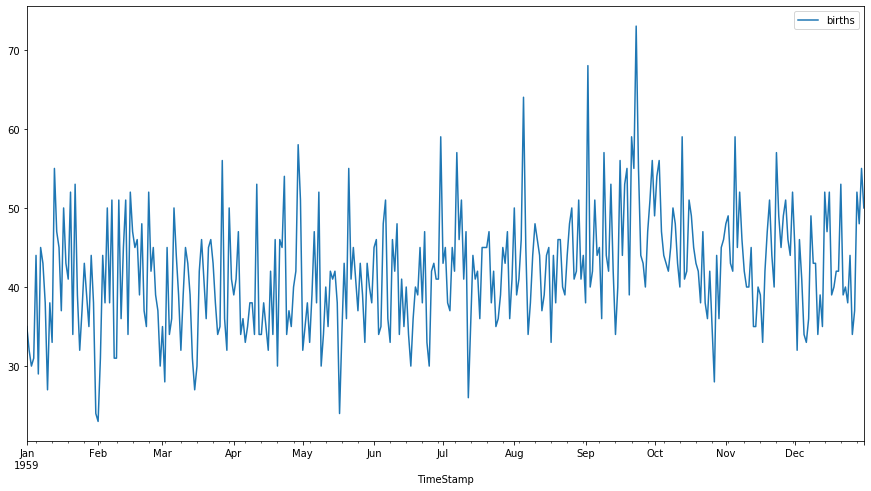

In [8]:
rcParams['figure.figsize']=15,8
df.plot()

#### 2.	Data understanding (15 marks)

a.	Decompose the time series and check for time series components. (4 marks)

b.	Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary?(3+1 marks)

c.	Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots? (2+2 marks)

d.	Split dataset into train and test sets. Use last one month data for testing. (3 marks)


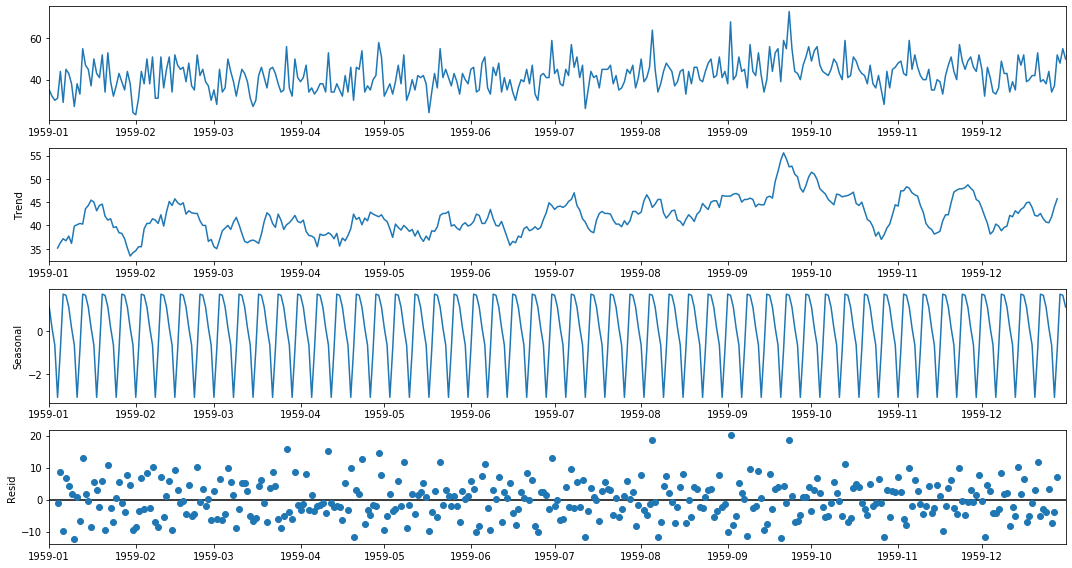

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df,model='additive')
decomposition.plot();

In [10]:
from statsmodels.tsa.stattools import adfuller
observation=df.values
test_result=adfuller(observation)
test_result

(-4.808291253559766,
 5.243412990149813e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [11]:
#series is non-stationary.appyling 1st order differencing

In [12]:
df_diff=df.diff(periods=1).dropna()
observations=df_diff.values
test_result=adfuller(observations)
test_result

(-12.625178633871363,
 1.5472400091968453e-23,
 6,
 357,
 {'1%': -3.44880082033912,
  '5%': -2.869670179576637,
  '10%': -2.5711012838861036},
 2355.0565353964653)

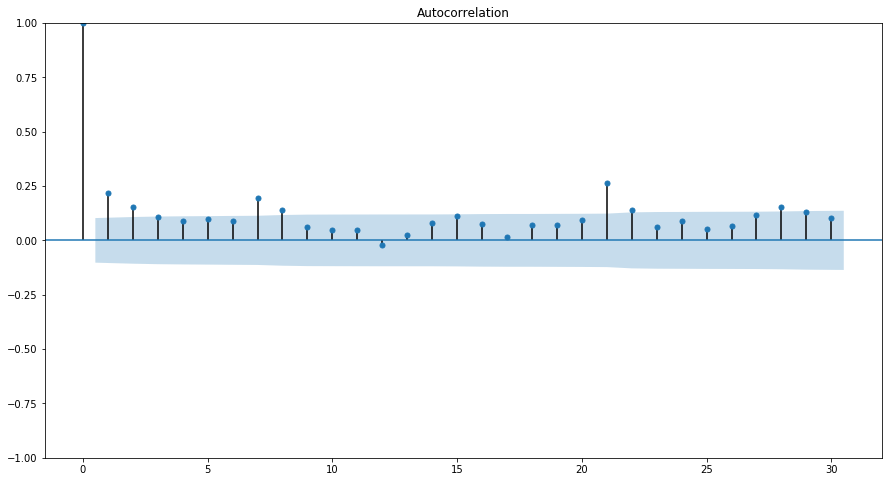

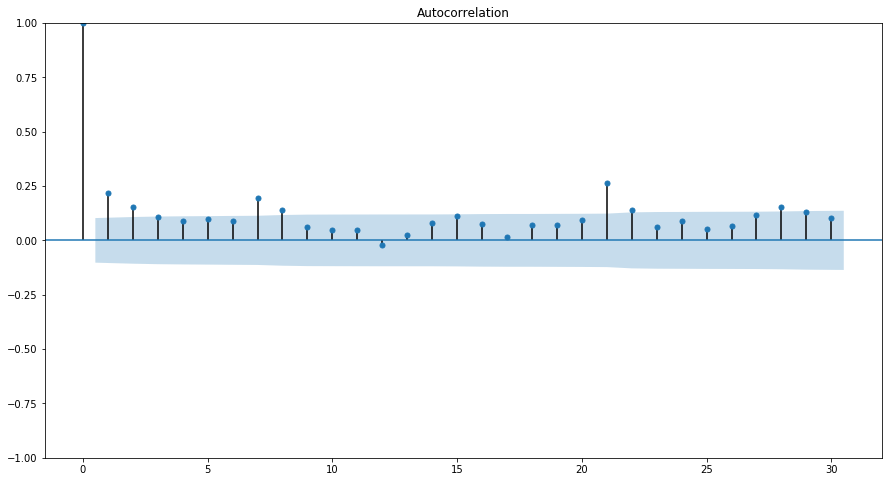

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df,lags=30)

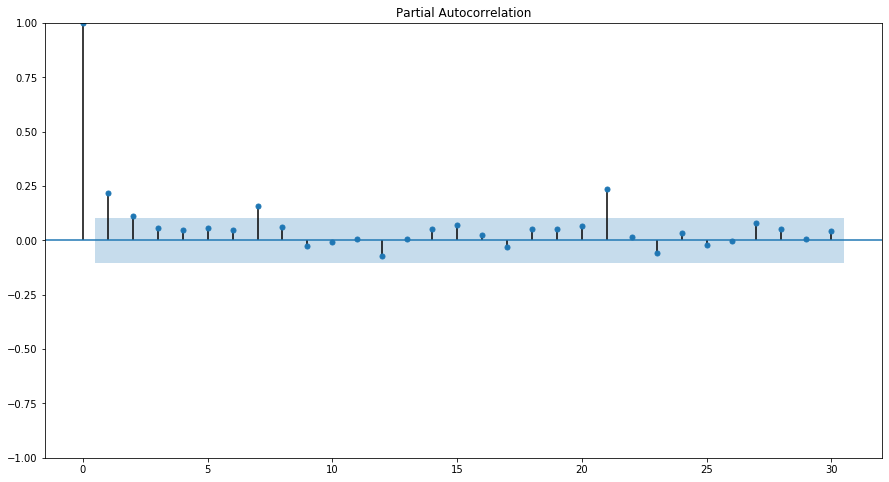

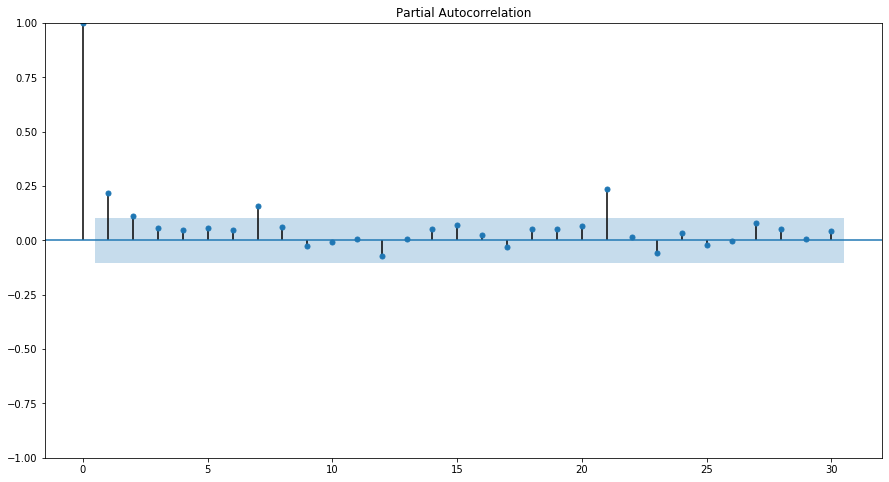

In [14]:
plot_pacf(df,lags=30)

In [15]:
# Orginal series is showing AR characteriestics as ACF plot is deylaying slowly ,while PACF is showing limited number of spikes before cut-off

In [16]:
train_end=datetime(1959,11,30)
test_end=datetime(1959,12,31)
train=df[:train_end]
test=df[train_end+timedelta(days=1):test_end]

In [17]:
train.shape

(334, 1)

In [18]:
test.shape

(31, 1)

### 3.	Model Building (20 marks)

a.	Fit a base model and observe the residuals, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (5 marks)

c.	How would you improve the model? What changes you will make in the base model. Fit the final model.   (10 marks)

d.	Analyze the residuals of final model. Feel free to use charts or graphs to explain. (2 marks) 

e.	Forecast the  births for next 1 months using the final model? (3 marks)


In [19]:
from statsmodels.tsa.arima_model import ARIMA
import itertools
p=q=range(0,4)
d=range(0,2)
pdq=list(itertools.product(p,d,q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model:{}'.format(pdq[i]))

parameter combinations for the Model
Model:(0, 0, 1)
Model:(0, 0, 2)
Model:(0, 0, 3)
Model:(0, 1, 0)
Model:(0, 1, 1)
Model:(0, 1, 2)
Model:(0, 1, 3)
Model:(1, 0, 0)
Model:(1, 0, 1)
Model:(1, 0, 2)
Model:(1, 0, 3)
Model:(1, 1, 0)
Model:(1, 1, 1)
Model:(1, 1, 2)
Model:(1, 1, 3)
Model:(2, 0, 0)
Model:(2, 0, 1)
Model:(2, 0, 2)
Model:(2, 0, 3)
Model:(2, 1, 0)
Model:(2, 1, 1)
Model:(2, 1, 2)
Model:(2, 1, 3)
Model:(3, 0, 0)
Model:(3, 0, 1)
Model:(3, 0, 2)
Model:(3, 0, 3)
Model:(3, 1, 0)
Model:(3, 1, 1)
Model:(3, 1, 2)
Model:(3, 1, 3)


In [20]:
dfobj1=pd.DataFrame(columns=['param','AIC'])
dfobj1

,param,AIC


In [21]:
from statsmodels.tsa.arima.model import ARIMA
for param in pdq:
    mod = ARIMA(train,order=param)
    result_arima=mod.fit()
    print('ARIMA{} - AIC:{}'.format(param,result_arima.aic))
    dfobj1=dfobj1.append({'param':param,'AIC':result_arima.aic},ignore_index=True)
    

ARIMA(0, 0, 0) - AIC:2289.4613380188653
ARIMA(0, 0, 1) - AIC:2278.5363193645508


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

ARIMA(0, 0, 2) - AIC:2275.4702487954964
ARIMA(0, 0, 3) - AIC:2274.3480956052445
ARIMA(0, 1, 0) - AIC:2429.1342188991493
ARIMA(0, 1, 1) - AIC:2254.572004149256
ARIMA(0, 1, 2) - AIC:2253.251400514603
ARIMA(0, 1, 3) - AIC:2254.452735965325


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

ARIMA(1, 0, 0) - AIC:2275.2273096766303
ARIMA(1, 0, 1) - AIC:2261.8018636510706


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

ARIMA(1, 0, 2) - AIC:2261.0206263356104


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 3) - AIC:2262.321664913589
ARIMA(1, 1, 0) - AIC:2349.661899380676
ARIMA(1, 1, 1) - AIC:2252.919465301815


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

ARIMA(1, 1, 2) - AIC:2254.2291770262286


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 3) - AIC:2256.1028501976616
ARIMA(2, 0, 0) - AIC:2272.135281238541


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

ARIMA(2, 0, 1) - AIC:2260.738383753648


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so i

ARIMA(2, 0, 2) - AIC:2262.2471080904734
ARIMA(2, 0, 3) - AIC:2265.0203658581604
ARIMA(2, 1, 0) - AIC:2320.5739535926386
ARIMA(2, 1, 1) - AIC:2254.3151595715117


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

ARIMA(2, 1, 2) - AIC:2256.0872051028127


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so i

ARIMA(2, 1, 3) - AIC:2254.4552161211604
ARIMA(3, 0, 0) - AIC:2271.8301553469364
ARIMA(3, 0, 1) - AIC:2262.21405333189


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so i

ARIMA(3, 0, 2) - AIC:2261.2424668608855


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so i

ARIMA(3, 0, 3) - AIC:2265.895495609644
ARIMA(3, 1, 0) - AIC:2306.935175059075
ARIMA(3, 1, 1) - AIC:2256.2322482021473


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so i

ARIMA(3, 1, 2) - AIC:2254.3628818680395
ARIMA(3, 1, 3) - AIC:2256.4355158645812


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [22]:
dfobj1.sort_values(by=['AIC'])

,param,AIC
13,"(1, 1, 1)",2252.919465
6,"(0, 1, 2)",2253.251401
14,"(1, 1, 2)",2254.229177
21,"(2, 1, 1)",2254.315160
30,"(3, 1, 2)",2254.362882
7,"(0, 1, 3)",2254.452736
23,"(2, 1, 3)",2254.455216
5,"(0, 1, 1)",2254.572004
22,"(2, 1, 2)",2256.087205
15,"(1, 1, 3)",2256.102850


In [23]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train,order=(2,1,3))
result_arima=model.fit()
print(result_arima.summary())

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 births   No. Observations:                  334
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1121.228
Date:                Sun, 16 Jun 2024   AIC                           2254.455
Time:                        07:02:03   BIC                           2277.304
Sample:                    01-01-1959   HQIC                          2263.566
                         - 11-30-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3408      0.398     -0.856      0.392      -1.121       0.440
ar.L2          0.6080      0.380      1.598      0.110      -0.138       1.354
ma.L1         -0.4986      0.558     -0.893      0.3

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [24]:
ARIMA_pred=result_arima.forecast(len(test))

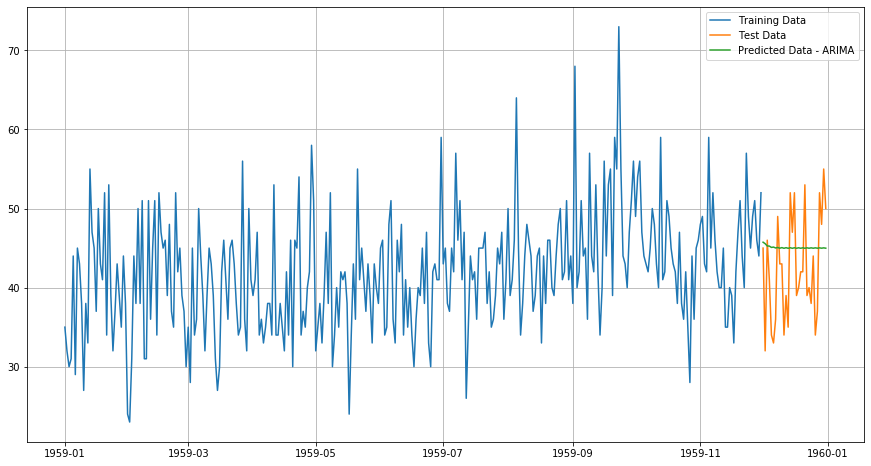

In [25]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_pred,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid()

In [26]:
from sklearn.metrics import mean_absolute_error
rmse=mean_absolute_error(test['births'],ARIMA_pred)
print(rmse)

6.144128320994477


In [27]:
def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100
mape=MAPE(test['births'].values,ARIMA_pred[0])
print(mape)

16.291133921156334


In [28]:
from statsmodels.tsa.api import ExponentialSmoothing

model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(optimized=True)
model_TES.summary()

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Dep. Variable:,births,No. Observations:,334
Model:,ExponentialSmoothing,SSE,15715.426
Optimized:,True,AIC,1308.320
Trend:,Additive,BIC,1350.242
Seasonal:,Additive,AICC,1309.457
Seasonal Periods:,7,Date:,"Sun, 16 Jun 2024"
Box-Cox:,False,Time:,07:02:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0409347,alpha,True
smoothing_trend,1.9295e-09,beta,True


In [29]:
TES_pred= model_TES.forecast(len(test))

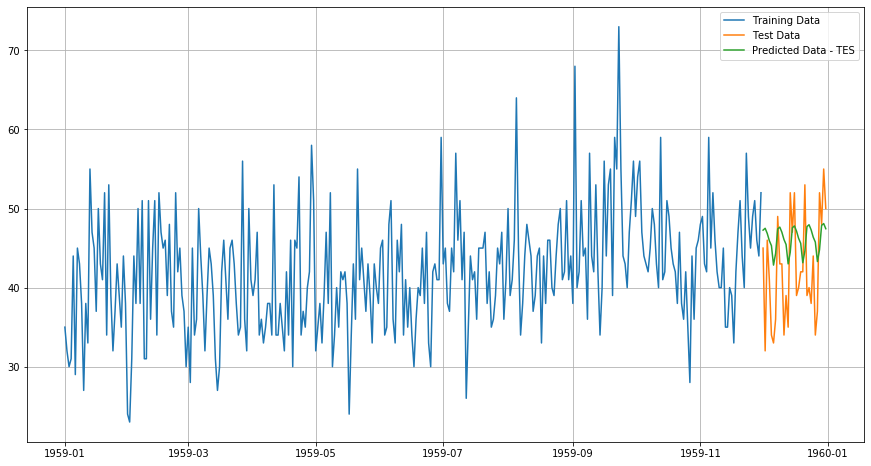

In [30]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_pred,label='Predicted Data - TES')
plt.legend(loc='best')
plt.grid()

In [31]:
rmse=mean_absolute_error(test['births'],TES_pred)
print(rmse)

6.219936663440152


In [32]:
mape=MAPE(test['births'].values,TES_pred[0])
print(mape)

18.231570665530644


In [33]:

p=q=range(0,3)
d=range(1,2)
pdq1=list(itertools.product(p,d,q))

model_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('parameter combinations for the Model')
print('Model:{}{}'.format(pdq1[1],model_pdq[1]))
print('Model:{}{}'.format(pdq1[2],model_pdq[2]))
print('Model:{}{}'.format(pdq1[3],model_pdq[3]))
print('Model:{}{}'.format(pdq1[4],model_pdq[4]))

parameter combinations for the Model
Model:(0, 1, 1)(0, 1, 1, 12)
Model:(0, 1, 2)(0, 1, 2, 12)
Model:(1, 1, 0)(1, 1, 0, 12)
Model:(1, 1, 1)(1, 1, 1, 12)


In [34]:
dfobj2=pd.DataFrame(columns=['param','seasonal','AIC'])
dfobj2

,param,seasonal,AIC


In [35]:
for param in pdq1:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,order=param,enforce_stationarity=False,enforce_invertibility=False)
        result_sarimax=mod.fit()
        print('SARIMA{} - AIC:{}'.format(param,param_seasonal,result_arima.aic))
        dfobj2=dfobj2.append({'param':param,'seasonal':param_seasonal,'AIC':result_arima.aic},ignore_index=True)

SARIMA(0, 1, 0) - AIC:(0, 1, 0, 12)
SARIMA(0, 1, 0) - AIC:(0, 1, 1, 12)
SARIMA(0, 1, 0) - AIC:(0, 1, 2, 12)
SARIMA(0, 1, 0) - AIC:(1, 1, 0, 12)
SARIMA(0, 1, 0) - AIC:(1, 1, 1, 12)
SARIMA(0, 1, 0) - AIC:(1, 1, 2, 12)
SARIMA(0, 1, 0) - AIC:(2, 1, 0, 12)
SARIMA(0, 1, 0) - AIC:(2, 1, 1, 12)
SARIMA(0, 1, 0) - AIC:(2, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(0, 1, 1) - AIC:(0, 1, 0, 12)
SARIMA(0, 1, 1) - AIC:(0, 1, 1, 12)
SARIMA(0, 1, 1) - AIC:(0, 1, 2, 12)
SARIMA(0, 1, 1) - AIC:(1, 1, 0, 12)
SARIMA(0, 1, 1) - AIC:(1, 1, 1, 12)
SARIMA(0, 1, 1) - AIC:(1, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(0, 1, 1) - AIC:(2, 1, 0, 12)
SARIMA(0, 1, 1) - AIC:(2, 1, 1, 12)
SARIMA(0, 1, 1) - AIC:(2, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(0, 1, 2) - AIC:(0, 1, 0, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2) - AIC:(0, 1, 1, 12)
SARIMA(0, 1, 2) - AIC:(0, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2) - AIC:(1, 1, 0, 12)
SARIMA(0, 1, 2) - AIC:(1, 1, 1, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2) - AIC:(1, 1, 2, 12)
SARIMA(0, 1, 2) - AIC:(2, 1, 0, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2) - AIC:(2, 1, 1, 12)
SARIMA(0, 1, 2) - AIC:(2, 1, 2, 12)
SARIMA(1, 1, 0) - AIC:(0, 1, 0, 12)
SARIMA(1, 1, 0) - AIC:(0, 1, 1, 12)
SARIMA(1, 1, 0) - AIC:(0, 1, 2, 12)
SARIMA(1, 1, 0) - AIC:(1, 1, 0, 12)
SARIMA(1, 1, 0) - AIC:(1, 1, 1, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(1, 1, 0) - AIC:(1, 1, 2, 12)
SARIMA(1, 1, 0) - AIC:(2, 1, 0, 12)
SARIMA(1, 1, 0) - AIC:(2, 1, 1, 12)
SARIMA(1, 1, 0) - AIC:(2, 1, 2, 12)
SARIMA(1, 1, 1) - AIC:(0, 1, 0, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(1, 1, 1) - AIC:(0, 1, 1, 12)
SARIMA(1, 1, 1) - AIC:(0, 1, 2, 12)
SARIMA(1, 1, 1) - AIC:(1, 1, 0, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(1, 1, 1) - AIC:(1, 1, 1, 12)
SARIMA(1, 1, 1) - AIC:(1, 1, 2, 12)
SARIMA(1, 1, 1) - AIC:(2, 1, 0, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(1, 1, 1) - AIC:(2, 1, 1, 12)
SARIMA(1, 1, 1) - AIC:(2, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2) - AIC:(0, 1, 0, 12)
SARIMA(1, 1, 2) - AIC:(0, 1, 1, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2) - AIC:(0, 1, 2, 12)
SARIMA(1, 1, 2) - AIC:(1, 1, 0, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2) - AIC:(1, 1, 1, 12)
SARIMA(1, 1, 2) - AIC:(1, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2) - AIC:(2, 1, 0, 12)
SARIMA(1, 1, 2) - AIC:(2, 1, 1, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2) - AIC:(2, 1, 2, 12)
SARIMA(2, 1, 0) - AIC:(0, 1, 0, 12)
SARIMA(2, 1, 0) - AIC:(0, 1, 1, 12)
SARIMA(2, 1, 0) - AIC:(0, 1, 2, 12)
SARIMA(2, 1, 0) - AIC:(1, 1, 0, 12)
SARIMA(2, 1, 0) - AIC:(1, 1, 1, 12)
SARIMA(2, 1, 0) - AIC:(1, 1, 2, 12)
SARIMA(2, 1, 0) - AIC:(2, 1, 0, 12)
SARIMA(2, 1, 0) - AIC:(2, 1, 1, 12)
SARIMA(2, 1, 0) - AIC:(2, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(2, 1, 1) - AIC:(0, 1, 0, 12)
SARIMA(2, 1, 1) - AIC:(0, 1, 1, 12)
SARIMA(2, 1, 1) - AIC:(0, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(2, 1, 1) - AIC:(1, 1, 0, 12)
SARIMA(2, 1, 1) - AIC:(1, 1, 1, 12)
SARIMA(2, 1, 1) - AIC:(1, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(2, 1, 1) - AIC:(2, 1, 0, 12)
SARIMA(2, 1, 1) - AIC:(2, 1, 1, 12)
SARIMA(2, 1, 1) - AIC:(2, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information

SARIMA(2, 1, 2) - AIC:(0, 1, 0, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2) - AIC:(0, 1, 1, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2) - AIC:(0, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2) - AIC:(1, 1, 0, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2) - AIC:(1, 1, 1, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2) - AIC:(1, 1, 2, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2) - AIC:(2, 1, 0, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2) - AIC:(2, 1, 1, 12)


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2) - AIC:(2, 1, 2, 12)


In [36]:
dfobj2.sort_values(by=['AIC'])

,param,seasonal,AIC
0,"(0, 1, 0)","(0, 1, 0, 12)",2254.455216
57,"(2, 1, 0)","(1, 1, 0, 12)",2254.455216
56,"(2, 1, 0)","(0, 1, 2, 12)",2254.455216
55,"(2, 1, 0)","(0, 1, 1, 12)",2254.455216
54,"(2, 1, 0)","(0, 1, 0, 12)",2254.455216
...,...,...,...
23,"(0, 1, 2)","(1, 1, 2, 12)",2254.455216
22,"(0, 1, 2)","(1, 1, 1, 12)",2254.455216
21,"(0, 1, 2)","(1, 1, 0, 12)",2254.455216
39,"(1, 1, 1)","(1, 1, 0, 12)",2254.455216


In [37]:
model = sm.tsa.statespace.SARIMAX(train,order=(1,1,0),seasonal_order=(1,1,2,12))
model_sarimax=model.fit()
print(model_sarimax.summary())

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                  births   No. Observations:                  334
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood               -1148.725
Date:                                 Sun, 16 Jun 2024   AIC                           2307.449
Time:                                         07:02:12   BIC                           2326.307
Sample:                                     01-01-1959   HQIC                          2314.979
                                          - 11-30-1959                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4716      0.048     -9.770      0.000      -0.566      -0

In [38]:
pred_start=test.index[0]
pred_end=test.index[-1]
SARIMA_predictions=model_sarimax.predict(start=pred_start,end=pred_end)

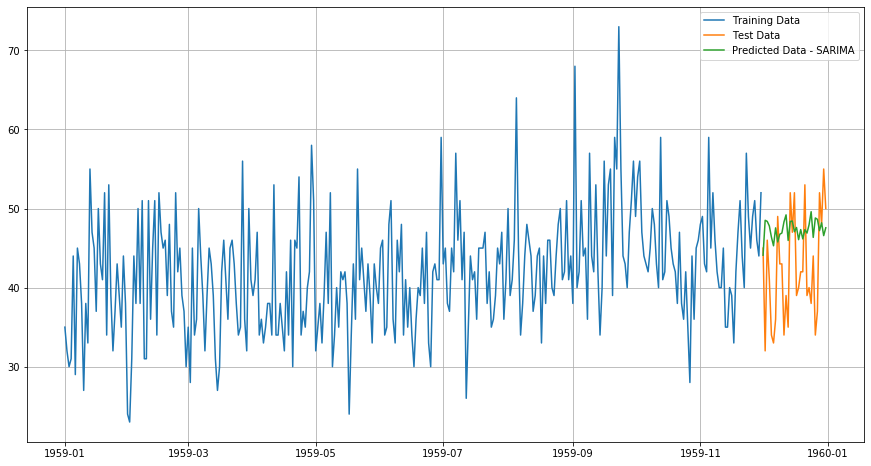

In [39]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid()

In [40]:
rmse=mean_absolute_error(test['births'],SARIMA_predictions)
print(rmse)

7.132239649837632


In [41]:
mape=MAPE(test['births'].values,SARIMA_predictions[0])
print(mape)

14.55893302542028


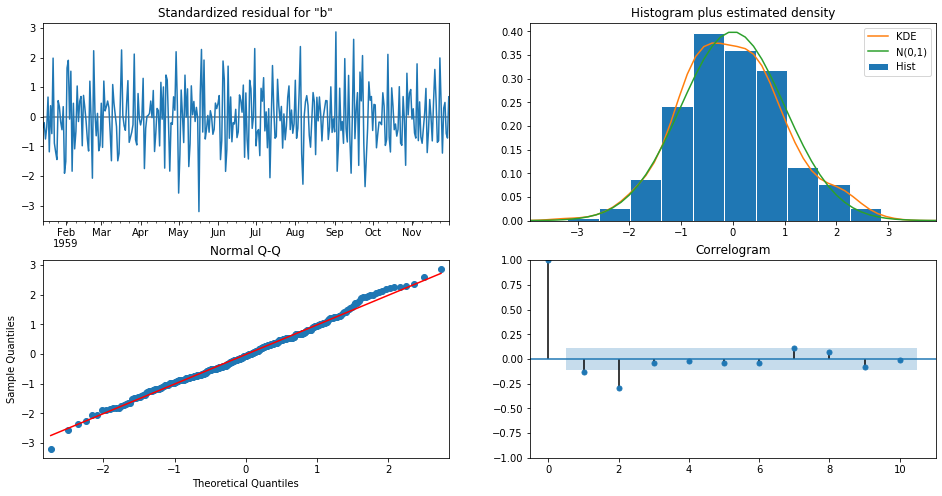

In [42]:
model_sarimax.plot_diagnostics(figsize=(16,8))
plt.show()

In [43]:
residuals=test['births'].values-SARIMA_predictions.values


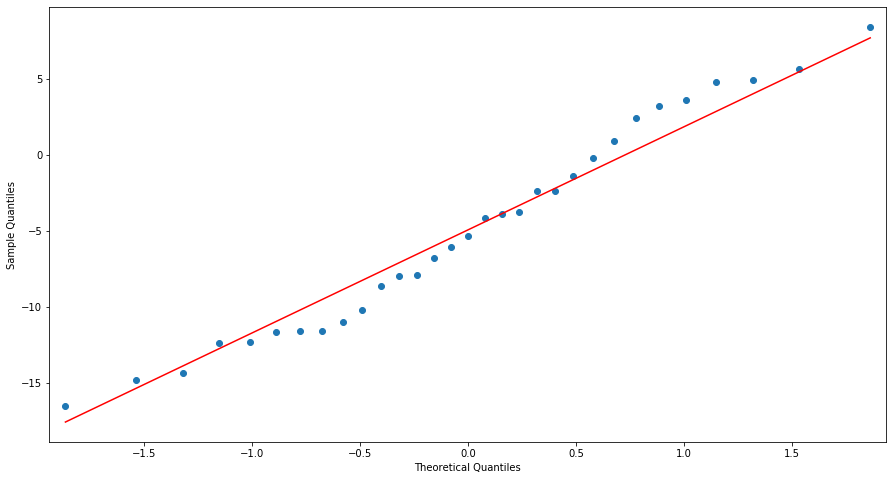

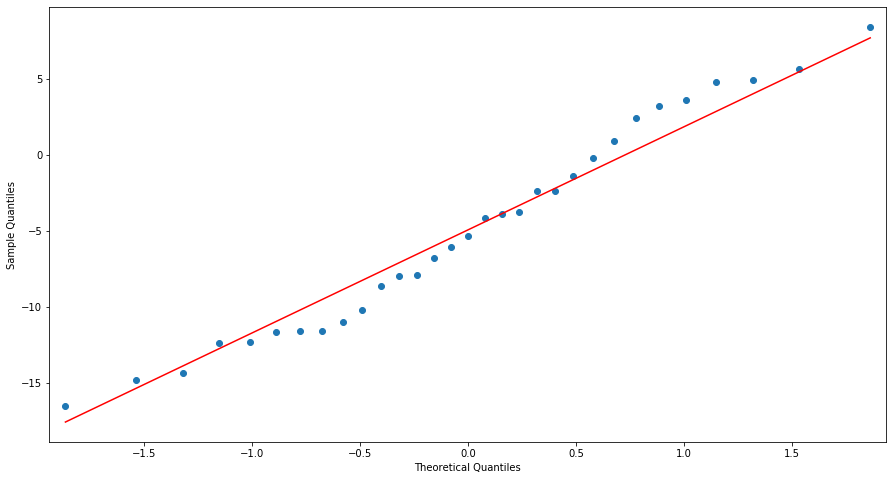

In [44]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals,line="s")

In [45]:
# residual points are falling approximately along this reference line

In [46]:
model = sm.tsa.statespace.SARIMAX(df,order=(1,1,0),seasonal_order=(1,1,2,12))
model_sarimax=model.fit()

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [47]:
forecast_value=model_sarimax.forecast(30)

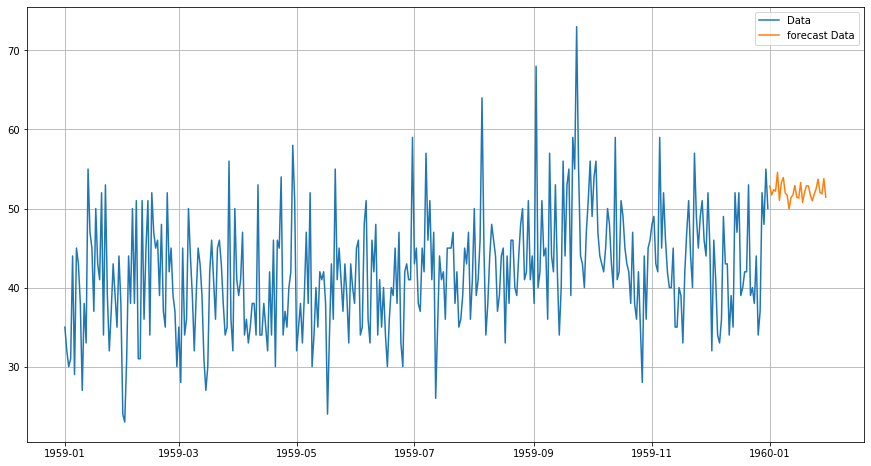

In [48]:
plt.plot(df,label='Data')
plt.plot(forecast_value,label='forecast Data')
plt.legend(loc='best')
plt.grid()